In [1]:
from plot_risk import plot_risk_categorical, plot_risk_continuous
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("Training50.csv")
test = pd.read_csv("Test50.csv")

In [3]:
def random_dates(start, end, n=10):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

start = pd.to_datetime('2019-01-01')
end = pd.to_datetime('2020-02-01')
train['date'] = random_dates(start, end, train.shape[0])

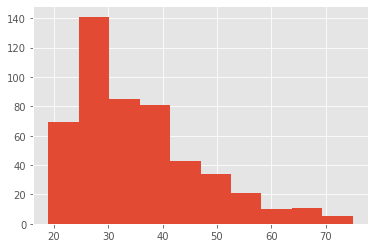

In [4]:
train['Age..years.'].hist()

Age..years._bins risk's stats
(34.0, 75.0]    0.780269
(23.0, 29.0]    0.659259
(29.0, 34.0]    0.684783
(-inf, 23.0]    0.620000
(75.0, inf]          NaN
Name: Age..years._bins, dtype: float64


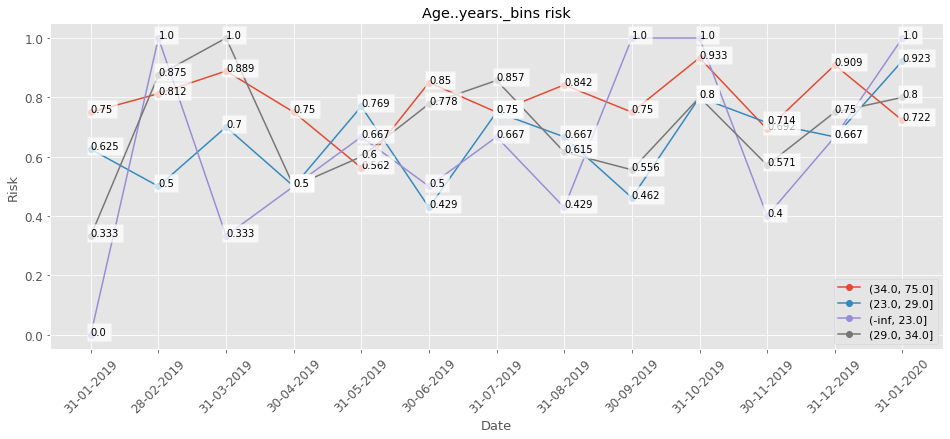

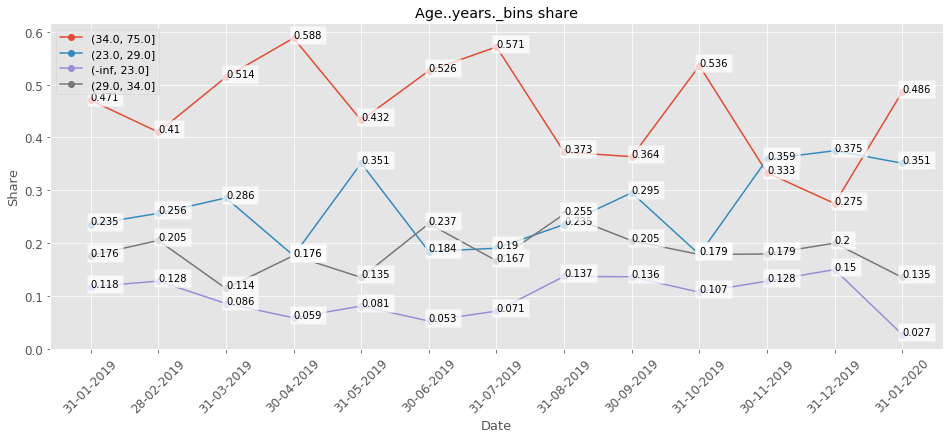

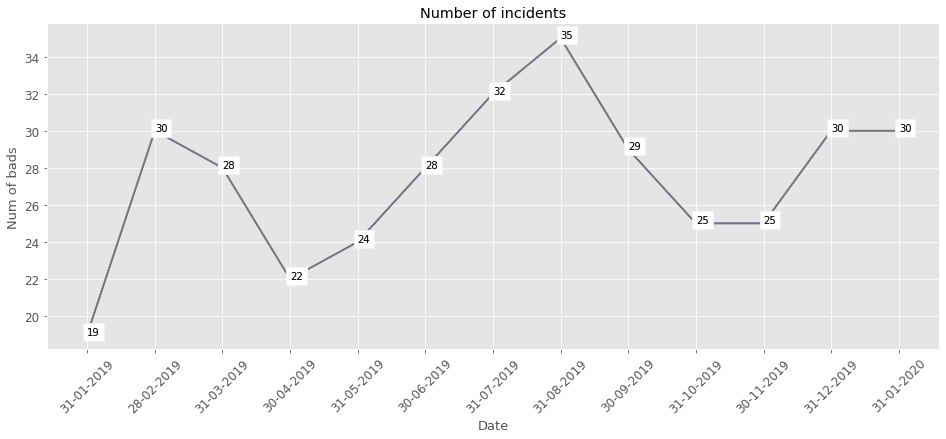

In [5]:
plot_risk_continuous(train, "Creditability", columns_to_show=['Age..years.'],
                      date_column='date', bad=1, bin_by_month=True)

In [6]:
train["Payment.Status.of.Previous.Credit"].value_counts()

2    258
3    205
1     37
Name: Payment.Status.of.Previous.Credit, dtype: int64

Payment.Status.of.Previous.Credit risk's stats
2    0.701550
3    0.800000
1    0.324324
Name: Payment.Status.of.Previous.Credit, dtype: float64


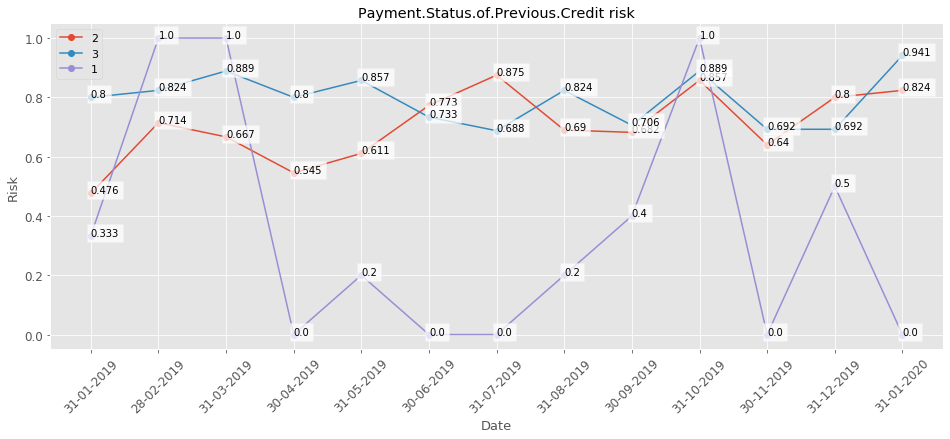

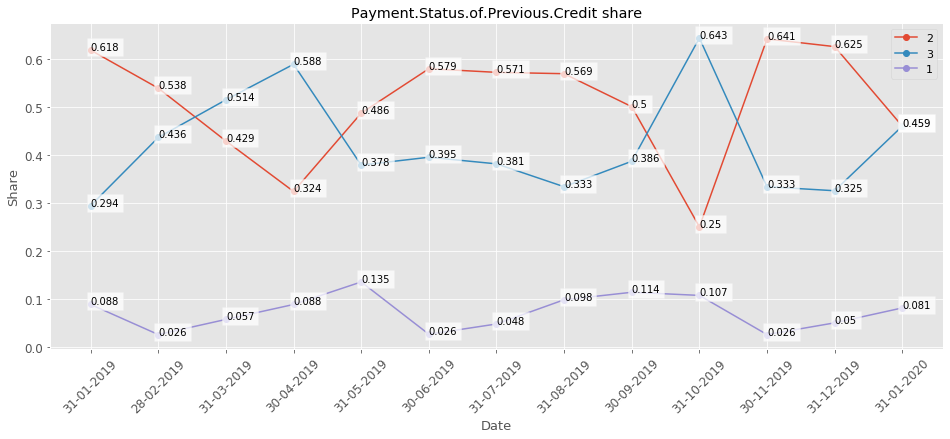

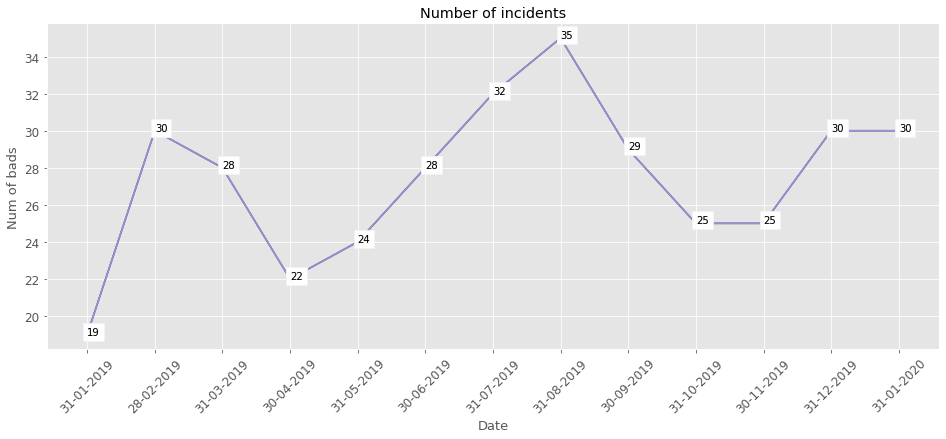

In [7]:
plot_risk_categorical(train, "Creditability", columns_to_show=['Payment.Status.of.Previous.Credit'],
                      date_column='date', bad=1, bin_by_month=True)

In [10]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
df = pd.read_csv(url, header=None, na_values='?')
df.columns = [str('column_'+str(i)) for i in range(16)]


start = pd.to_datetime('2019-01-01')
end = pd.to_datetime('2020-01-01')
df['date'] = random_dates(start, end, df.shape[0])
df['risk'] = np.where(df.column_15=='+', 1, 0)

column_4 risk's stats
g     0.493256
p     0.276074
gg    1.000000
Name: column_4, dtype: float64


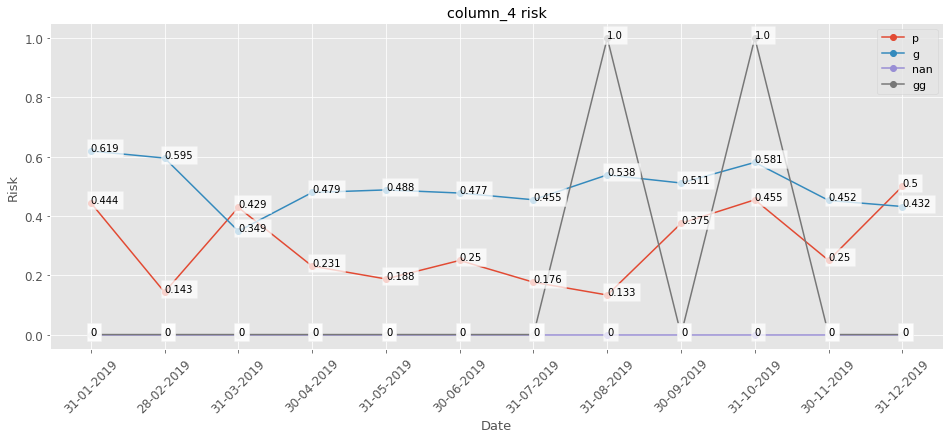

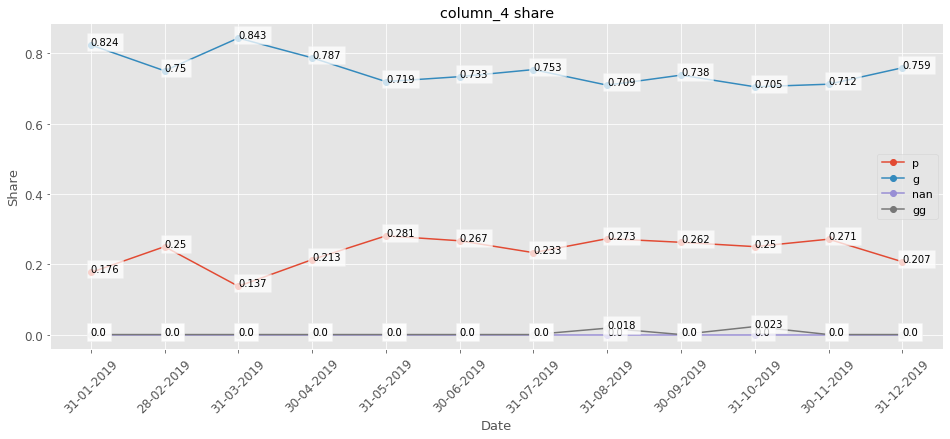



column_0 risk's stats
b    0.440171
a    0.466667
Name: column_0, dtype: float64


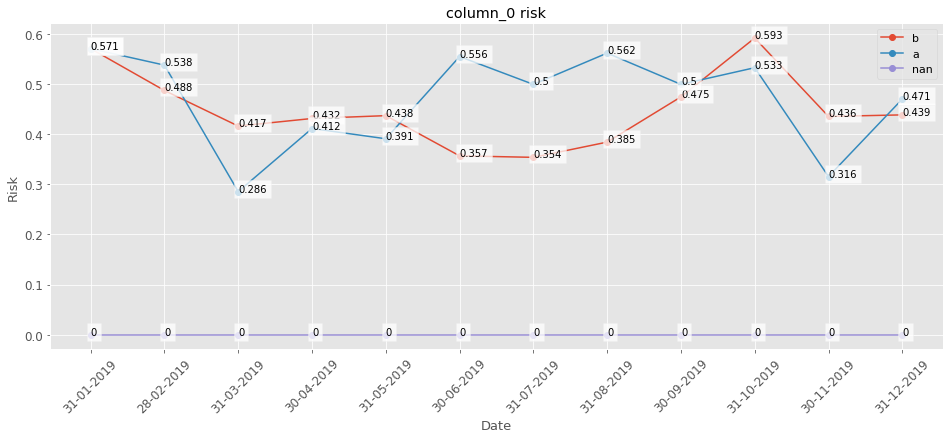

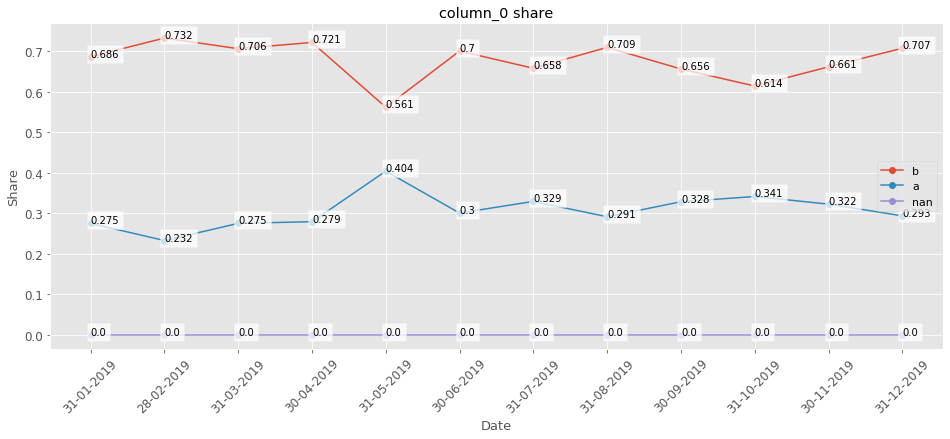

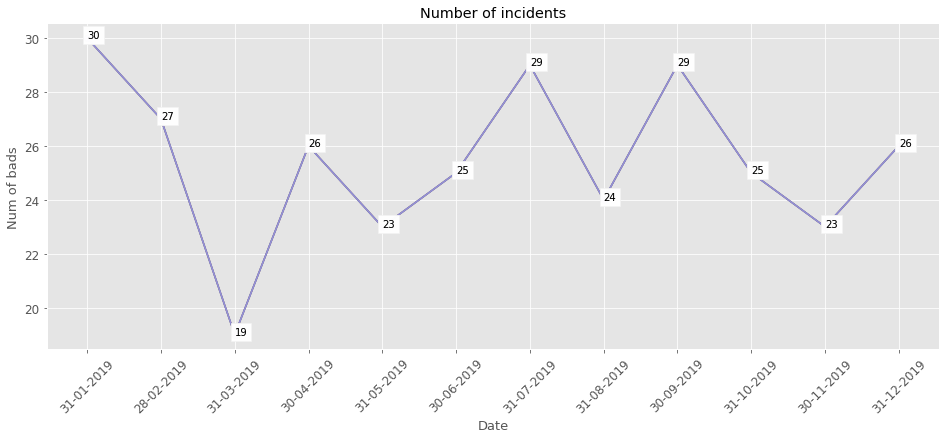

In [11]:
plot_risk_categorical(df, "risk", columns_to_show=['column_4','column_0'],
                      date_column='date', bad=1, data_bin_n=12, bin_by_month=True)

column_1_bins risk's stats
(-inf, 20.0]    0.285714
(20.0, 37.0]    0.423559
(37.0, 41.0]    0.491228
(41.0, 80.0]    0.625954
(80.0, inf]          NaN
Name: column_1_bins, dtype: float64


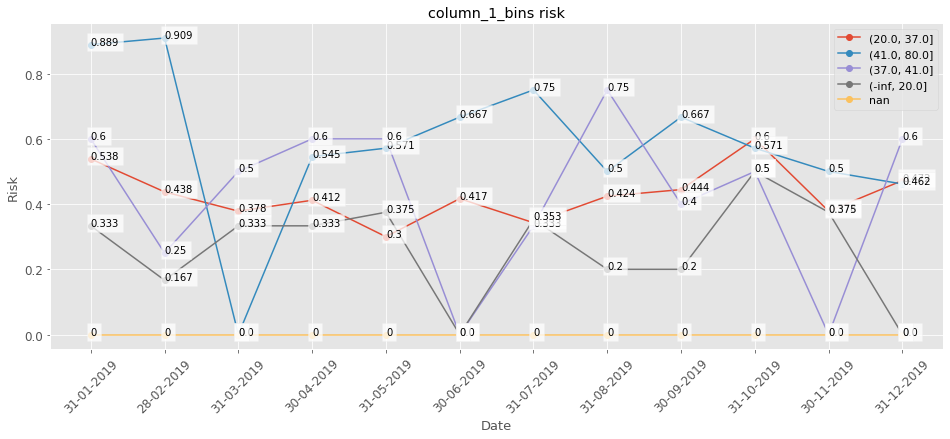

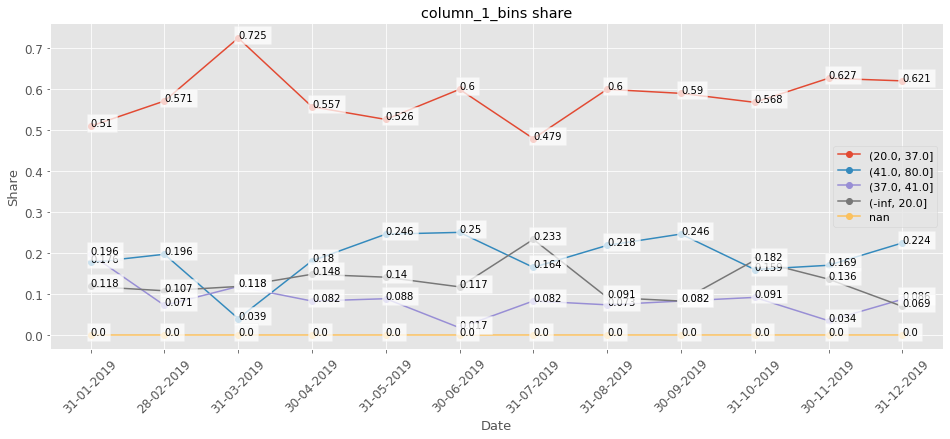



column_2_bins risk's stats
(-inf, 1.0]    0.337963
(1.0, 4.0]     0.362745
(4.0, 7.0]     0.551020
(7.0, 28.0]    0.616279
(28.0, inf]         NaN
Name: column_2_bins, dtype: float64


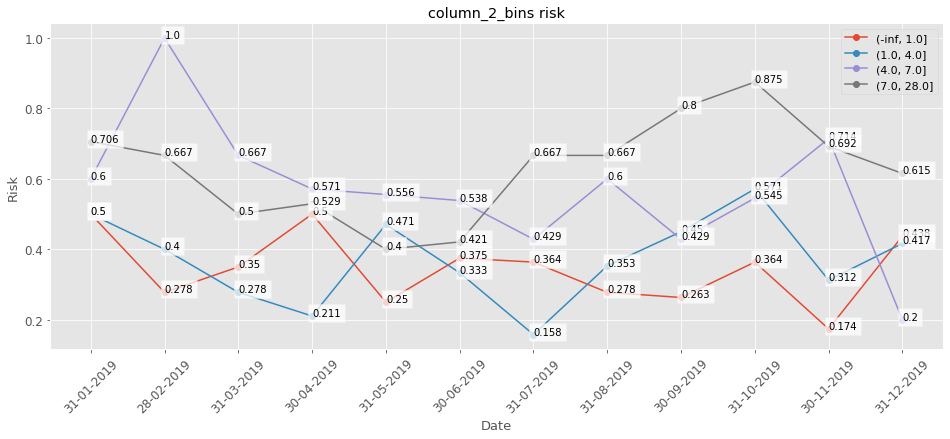

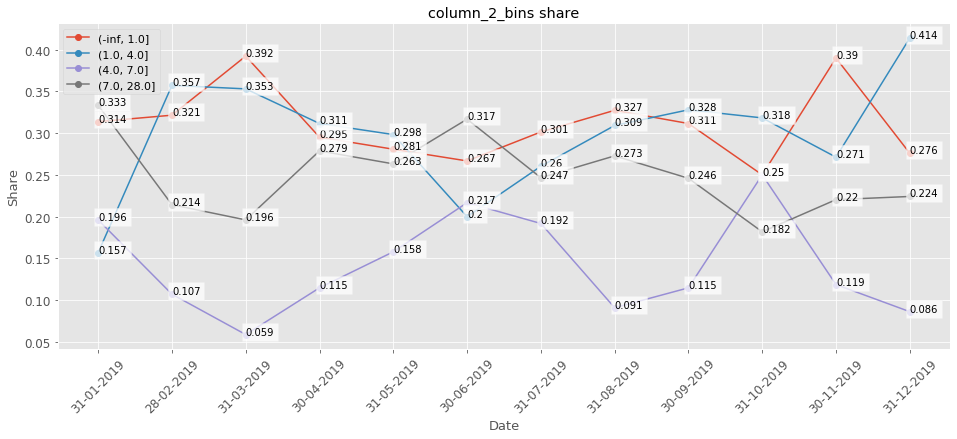

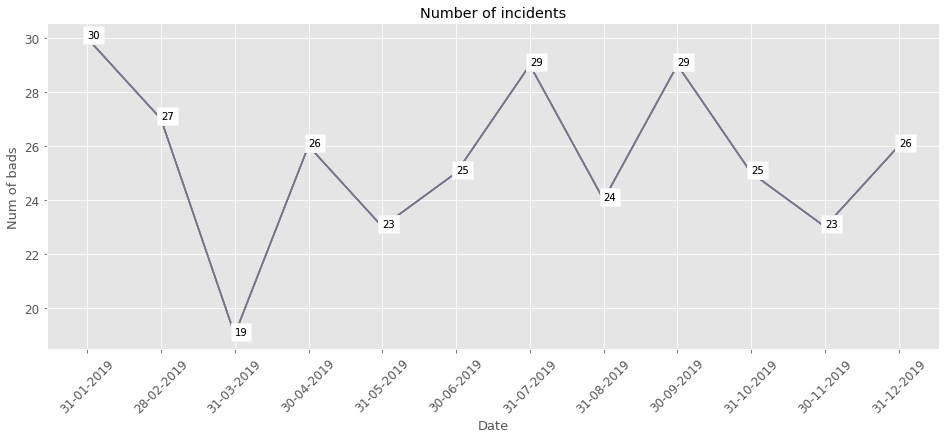

In [13]:
plot_risk_continuous(df, "risk", columns_to_show=['column_1','column_2'],
                      date_column='date', bad=1, data_bin_n=12, bin_by_month=True)